In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("Downloads/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
feature_names=df.columns
feature_names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
X=df.drop('Species',axis=1)
y=df['Species']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

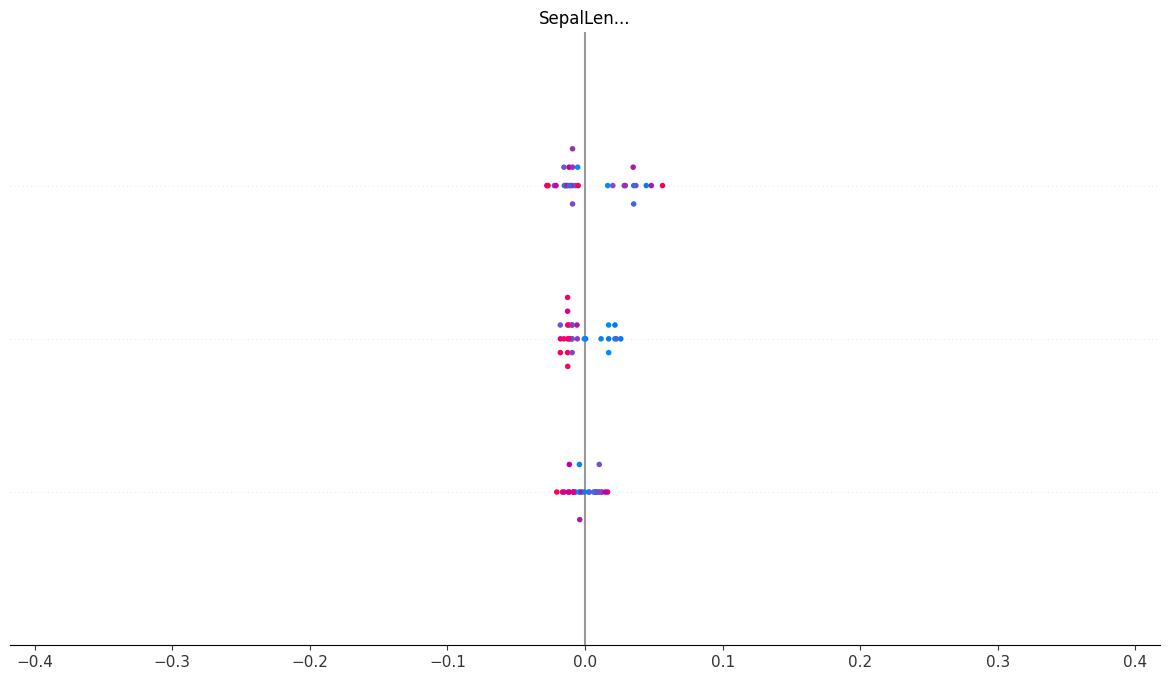

In [36]:
import shap
explainer=shap.KernelExplainer(model.predict_proba,X_train)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)